In [1]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
from scipy.spatial.distance import cdist

In [2]:
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import StandardScaler
tform=transforms.Compose([
                           transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))])

def fileFeedforGNN(name):

  data = pd.read_table(name)

  y = data.iloc[:,-3].values
  
  
  print(np.unique(y))


  graphList = []
  


    
  #num_objects	r_std	r_var	r_mean	r_min	r_max	snr_std	snr_var	snr_mean	snr_min	snr_max	noise_std	noise_var	noise_mean	noise_min	noise_max	obj	environment	
  X_array = data.iloc[:, 0:16].values
  

  addList_bot, addList_clothes, addList_plastics, addList_steel  = [],[],[],[]
    
  for i in range(len(X_array)):
    intarray = np.concatenate((X_array[i],X_array[i]),axis =0)
    if(y[i] =='bot'):
      addList_bot.append(intarray)
    elif (y[i] == 'clothes'):
      addList_clothes.append(intarray)
    elif (y[i] == 'plastic'):
      addList_plastics.append(intarray)
    elif (y[i] == 'steel'):
      addList_steel.append(intarray)
  

  for i in range(len(addList_bot) - 31):
        
        img = np.array(addList_bot[i:i+32])
        
        if(i<1):
            print(img)
        
        graphList.append((tform(img),0))

  for i in range(len(addList_clothes) - 31):
    
        img = np.array(addList_clothes[i:i+32])
        
        if(i<1):
            print(img)
        
        graphList.append((tform(img),1))
        
  for i in range(len(addList_plastics) - 31):
        img = np.array(addList_plastics[i:i+32])
        
        if(i<1):
            print(img)
            
        graphList.append((tform(img),2))
        
  for i in range(len(addList_steel) - 31):
    
        img = np.array(addList_steel[i:i+32])
        
        if(i<1):
            print(img)
        graphList.append((tform(img),3))
  
  
  
  print(len(graphList))
    
    
 
  return graphList




############################## data loading for 3.5 inch#####################

graphList_lablight_3_5 = fileFeedforGNN('lablight_3.5_.txt')
graphList_night_3_5 = fileFeedforGNN('night_3.5_.txt')
graphList_sunny_3_5 = fileFeedforGNN('sunny_3.5_.txt')


lablight_train_len = int(len(graphList_lablight_3_5)*0.7)
night_train_len = int(len(graphList_night_3_5)*0.7)
sunny_tarin_len = int(len(graphList_sunny_3_5)*0.7)


batch_size=64
test_batch_size=64

random.shuffle(graphList_lablight_3_5)
random.shuffle(graphList_night_3_5)
random.shuffle(graphList_sunny_3_5)

train_loader_lablight_3_5 = torch.utils.data.DataLoader(graphList_lablight_3_5[0:lablight_train_len],batch_size)  
test_loader_lablight_3_5 = torch.utils.data.DataLoader(graphList_lablight_3_5[lablight_train_len:],test_batch_size) 

train_loader_night_3_5 = torch.utils.data.DataLoader(graphList_night_3_5[0:night_train_len],batch_size)  
test_loader_night_3_5 = torch.utils.data.DataLoader(graphList_night_3_5[night_train_len:],test_batch_size) 

train_loader_sunny_3_5 = torch.utils.data.DataLoader(graphList_sunny_3_5[0:sunny_tarin_len],batch_size)  
test_loader_sunny_3_5 = torch.utils.data.DataLoader(graphList_sunny_3_5[sunny_tarin_len:],test_batch_size) 

print(len(graphList_lablight_3_5))
print(len(graphList_night_3_5))
print(len(graphList_sunny_3_5))



############################## data loading for 7 inch#####################

graphList_lablight_7= fileFeedforGNN('lablight_7_.txt')
graphList_night_7 = fileFeedforGNN('night_7_.txt')
graphList_sunny_7 = fileFeedforGNN('sunny_7_.txt')


lablight_train_len = int(len(graphList_lablight_7)*0.7)
night_train_len = int(len(graphList_night_7)*0.7)
sunny_tarin_len = int(len(graphList_sunny_7)*0.7)


batch_size=64
test_batch_size=64

random.shuffle(graphList_lablight_7)
random.shuffle(graphList_night_7)
random.shuffle(graphList_sunny_7)

train_loader_lablight_7 = torch.utils.data.DataLoader(graphList_lablight_7[0:lablight_train_len],batch_size)  
test_loader_lablight_7 = torch.utils.data.DataLoader(graphList_lablight_7[lablight_train_len:],test_batch_size) 

train_loader_night_7 = torch.utils.data.DataLoader(graphList_night_7[0:night_train_len],batch_size)  
test_loader_night_7 = torch.utils.data.DataLoader(graphList_night_7[night_train_len:],test_batch_size) 

train_loader_sunny_7= torch.utils.data.DataLoader(graphList_sunny_7[0:sunny_tarin_len],batch_size)  
test_loader_sunny_7= torch.utils.data.DataLoader(graphList_sunny_7[sunny_tarin_len:],test_batch_size) 

print(len(graphList_lablight_7))
print(len(graphList_night_7))
print(len(graphList_sunny_7))


['bot' 'clothes' 'plastic' 'steel']
[[ 3.          1.54908948  2.39967822 ... 55.33333333 54.
  58.        ]
 [ 3.          1.54908948  2.39967822 ... 55.33333333 54.
  58.        ]
 [ 3.          1.54908948  2.39967822 ... 55.33333333 54.
  58.        ]
 ...
 [ 5.          1.18798493  1.4113082  ... 58.4        53.
  62.        ]
 [ 5.          1.18798493  1.4113082  ... 58.         53.
  62.        ]
 [ 4.          1.31552158  1.73059701 ... 57.75       53.
  63.        ]]
[[ 6.          1.38134854  1.90812379 ... 59.         53.
  66.        ]
 [ 7.          1.45780205  2.12518682 ... 58.71428571 53.
  66.        ]
 [ 7.          1.45780272  2.12518877 ... 58.71428571 53.
  66.        ]
 ...
 [ 8.          1.42236846  2.02313204 ... 58.375      53.
  66.        ]
 [ 8.          1.26366319  1.59684467 ... 58.375      53.
  66.        ]
 [ 7.          1.35292182  1.83039746 ... 59.         53.
  67.        ]]
[[ 5.          1.20000702  1.44001685 ... 59.         52.
  70.        ]
 [ 

In [16]:
import torch.utils.data as data
from PIL import Image
import os
from torch.autograd import Function
import torch.nn as nn
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

    
import os
import torch.backends.cudnn as cudnn
import torch.utils.data
from torchvision import transforms

from torchvision import datasets

class ReverseLayerF(Function):

    @staticmethod
    def forward(ctx, x, alpha):
        ctx.alpha = alpha

        return x.view_as(x)

    @staticmethod
    def backward(ctx, grad_output):
        output = grad_output.neg() * ctx.alpha

        return output, None





# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 

class_labels = 4
classes = ('bot', 'clothes', 'plastic', 'steel')


conv_val = 26
out_channel = 16
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.feature = nn.Sequential()
        self.feature.add_module('f_conv1', nn.Conv2d(1, 4, 3))
        self.feature.add_module('f_relu1', nn.ReLU(True))
        self.feature.add_module('f_conv2', nn.Conv2d(4, 8, 3))
        self.feature.add_module('f_relu2', nn.ReLU(True))
        self.feature.add_module('f_conv3', nn.Conv2d(8, 16, 3))
        self.feature.add_module('f_relu3', nn.ReLU(True))
      
        
        self.class_classifier = nn.Sequential()
        self.class_classifier.add_module('c_fc1', nn.Linear(out_channel* conv_val *conv_val, 120))
        self.class_classifier.add_module('c_relu1', nn.ReLU(True))
        self.class_classifier.add_module('c_fc2', nn.Linear(120, 84))
        self.class_classifier.add_module('c_relu2', nn.ReLU(True))
        self.class_classifier.add_module('c_fc3', nn.Linear(84,4))
        
        self.domain_classifier = nn.Sequential()
        self.domain_classifier.add_module('d_fc1', nn.Linear(out_channel* conv_val *conv_val, 120))
        self.domain_classifier.add_module('d_relu1', nn.ReLU(True))
        self.domain_classifier.add_module('d_fc2', nn.Linear(120, 2))
       
        
        
        
        


    def forward(self, input_data, alpha):
        
        
       
        feature = self.feature(input_data)
        feature = feature.view(-1, out_channel* conv_val *conv_val)
        reverse_feature = ReverseLayerF.apply(feature, alpha)
        class_output = self.class_classifier(feature)
        domain_output = self.domain_classifier(reverse_feature)

        return class_output, domain_output
      
    




def test(dataset_name):
    #assert dataset_name in ['MNIST', 'mnist_m']

    model_root = ''
    image_root = os.path.join('dataset', dataset_name)

    cuda = True
    cudnn.benchmark = True
    batch_size =  64
    image_size = 28
    alpha = 0

    """load data"""

    img_transform_source = transforms.Compose([
        transforms.Resize(image_size),
        transforms.ToTensor(),
        transforms.Normalize(mean=(0.1307,), std=(0.3081,))
    ])

    img_transform_target = transforms.Compose([
        transforms.Resize(image_size),
        transforms.ToTensor(),
        transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
    ])

    if dataset_name == 'mnist_m':
        test_list = os.path.join(image_root, 'mnist_m_test_labels.txt')

        dataset = GetLoader(
            data_root=os.path.join(image_root, 'mnist_m_test'),
            data_list=test_list,
            transform=img_transform_target
        )
    else:
        dataset = datasets.MNIST(
            root='dataset',
            train=False,
            transform=img_transform_source,
        )

    dataloader = torch.utils.data.DataLoader(
        dataset=dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=8
    )

    """ test """

    my_net = torch.load(os.path.join(
        model_root, 'mnist_mnistm_model_epoch_current.pth'
    ))
    my_net = my_net.eval()

    if cuda:
        my_net = my_net.cuda()

    len_dataloader = len(dataloader)
    data_target_iter = iter(dataloader)

    i = 0
    n_total = 0
    n_correct = 0

    while i < len_dataloader:

        # test model using target data
        data_target = next(data_target_iter)
        t_img, t_label = data_target

        batch_size = len(t_label)

        if cuda:
            t_img = t_img.cuda()
            t_label = t_label.cuda()

        class_output, _ = my_net(input_data=t_img, alpha=alpha)
        pred = class_output.data.max(1, keepdim=True)[1]
        n_correct += pred.eq(t_label.data.view_as(pred)).cpu().sum()
        n_total += batch_size

        i += 1

    accu = n_correct.data.numpy() * 1.0 / n_total

    return accu

In [17]:
import random
import os
import sys
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import numpy as np

from torchvision import datasets
from torchvision import transforms



source_dataset_name = 'MNIST'
target_dataset_name = 'mnist_m'
source_image_root = os.path.join('dataset', source_dataset_name)
print(source_image_root)
target_image_root = os.path.join('dataset', target_dataset_name)
print(target_image_root)
model_root = 'models'
cuda = True
cudnn.benchmark = True
lr = 1e-3
batch_size = 128
image_size = 28
n_epoch = 5

manual_seed = random.randint(1, 10000)
random.seed(manual_seed)
torch.manual_seed(manual_seed)

# load data

img_transform_source = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.1307,), std=(0.3081,))
])

img_transform_target = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
])

dataset_source = datasets.MNIST(
    root='dataset',
    train=True,
    transform=img_transform_source,
    download=True
)

dataloader_source = torch.utils.data.DataLoader(
    dataset=dataset_source,
    batch_size=batch_size,
    shuffle=True,
    num_workers=8)

# print("dataloader_source.shape")
# print(dataloader_source.shape())

train_list = os.path.join(target_image_root, 'mnist_m_train_labels.txt')

dataset_target = GetLoader(
    data_root=os.path.join(target_image_root, 'mnist_m_train'),
    data_list=train_list,
    transform=img_transform_target
)

dataloader_target = torch.utils.data.DataLoader(
    dataset=dataset_target,
    batch_size=batch_size,
    shuffle=True,
    num_workers=8)

# load model

# print("dataloader_target.shape")
# print(dataloader_target.shape())

my_net = CNNModel()

# setup optimizer

optimizer = optim.Adam(my_net.parameters(), lr=lr)

loss_class = torch.nn.NLLLoss()
loss_domain = torch.nn.NLLLoss()

if cuda:
    my_net = my_net.cuda()
    loss_class = loss_class.cuda()
    loss_domain = loss_domain.cuda()

for p in my_net.parameters():
    p.requires_grad = True

# training
best_accu_t = 0.0

accList = []
errList = []

for epoch in range(n_epoch):

    len_dataloader = min(len(dataloader_source), len(dataloader_target))
    data_source_iter = iter(dataloader_source)
    data_target_iter = iter(dataloader_target)

    for i in range(len_dataloader):

        p = float(i + epoch * len_dataloader) / n_epoch / len_dataloader
        alpha = 2. / (1. + np.exp(-10 * p)) - 1

        # training model using source data
        data_source = next(data_source_iter)
        s_img, s_label = data_source
        
        # print('\n')
        # print(s_img.shape)
        # print(s_label)

        my_net.zero_grad()
        batch_size = len(s_label)

        domain_label = torch.zeros(batch_size).long()

        if cuda:
            s_img = s_img.cuda()
            s_label = s_label.cuda()
            domain_label = domain_label.cuda()


        class_output, domain_output = my_net(input_data=s_img, alpha=alpha)
        err_s_label = loss_class(class_output, s_label)
        err_s_domain = loss_domain(domain_output, domain_label)

        # training model using target data
        data_target = next(data_target_iter)
        t_img, _ = data_target
        
        
        # print('\n I am in targert')
        # print(t_img.shape)
        # print(_)

        batch_size = len(t_img)

        domain_label = torch.ones(batch_size).long()

        if cuda:
            t_img = t_img.cuda()
            domain_label = domain_label.cuda()

        _, domain_output = my_net(input_data=t_img, alpha=alpha)
        err_t_domain = loss_domain(domain_output, domain_label)
        err = err_t_domain + err_s_domain + err_s_label
        err.backward()
        optimizer.step()
        
        errList.append(err)

        sys.stdout.write('\r epoch: %d, [iter: %d / all %d], err_s_label: %f, err_s_domain: %f, err_t_domain: %f' \
              % (epoch, i + 1, len_dataloader, err_s_label.data.cpu().numpy(),
                 err_s_domain.data.cpu().numpy(), err_t_domain.data.cpu().item()))
        sys.stdout.flush()
        torch.save(my_net, 'mnist_mnistm_model_epoch_current.pth'.format(model_root))

    print('\n')
    accu_s = test(source_dataset_name)
    print('Accuracy of the %s dataset: %f' % ('mnist', accu_s))
    accu_t = test(target_dataset_name)
    print('Accuracy of the %s dataset: %f\n' % ('mnist_m', accu_t))
    accList.append([accu_s,accu_t])
    if accu_t > best_accu_t:
        best_accu_s = accu_s
        best_accu_t = accu_t
        torch.save(my_net, 'mnist_mnistm_model_epoch_best.pth'.format(model_root))

print('============ Summary ============= \n')
print('Accuracy of the %s dataset: %f' % ('mnist', best_accu_s))
print('Accuracy of the %s dataset: %f' % ('mnist_m', best_accu_t))
print('Corresponding model was save in ' + model_root + 'mnist_mnistm_model_epoch_best.pth')

dataset/MNIST
dataset/mnist_m


RuntimeError: CUDA error: out of memory
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.

NameError: name 'accList' is not defined

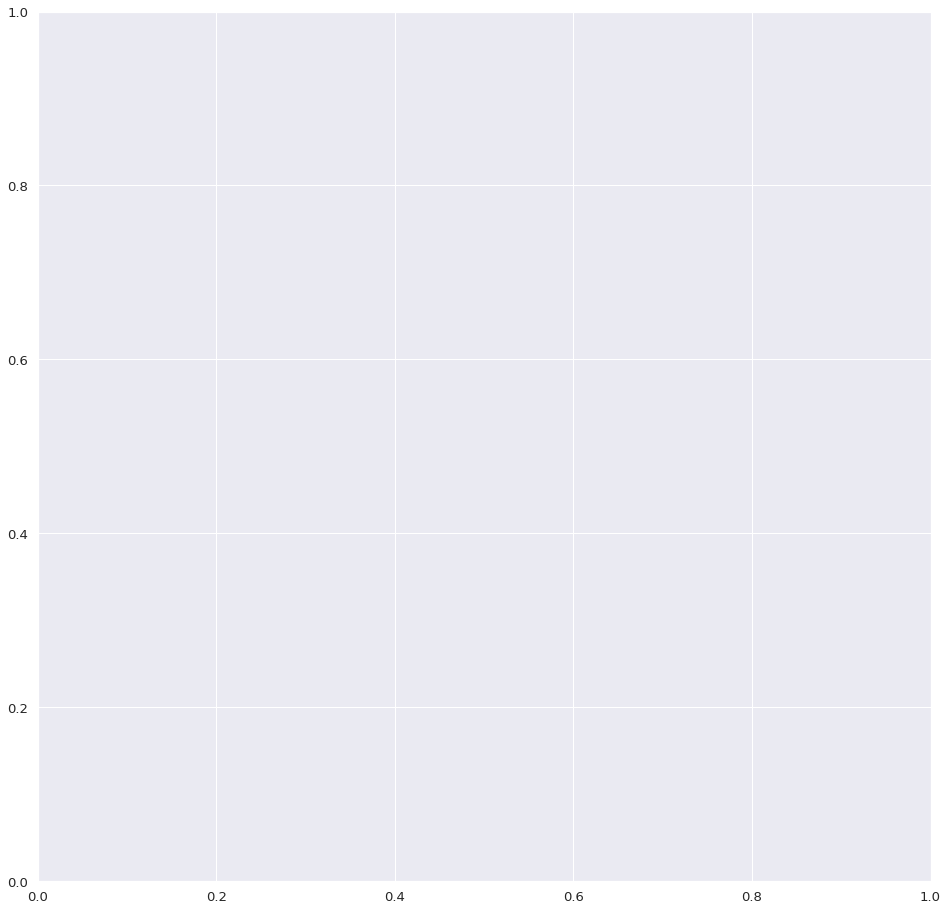

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

x = [i for i in range(150)]


sns.set(rc={'figure.figsize':(16,16) },font_scale=1.2)
fig, ax0 = plt.subplots(1, 1)

y1 = accList

    #print(y)
var = 7

# plotting strip plot with seaborn
sns.lineplot(x, y1,ax=ax0,linewidth = var)


y2 = lossList
#print(y)

sns.lineplot(x, y2, ax = ax0,linewidth = var)

# giving labels to x-axis and y-axis
ax0.set(xlabel ='Epochs', ylabel ='Loss or Testing accuracy')

ax0.set_xlabel(ax0.get_xlabel(), fontdict={'weight': 'bold'}, fontsize = 20)
ax0.set_ylabel(ax0.get_ylabel(), fontdict={'weight': 'bold'},fontsize = 20)
ax0.legend(['Testing Accuracy', 'Train loss'],fontsize = 20,loc='upper center',bbox_to_anchor=(0.5, 1.09),
ncol=2)

plt.savefig('lablight'+'.PNG', bbox_inches = "tight")
    

In [57]:



!pip3 install seaborn

     |████████████████████████████████| 292 kB 14.9 MB/s            
